# collocations : 단어의 시퀀스
### frequency, pointwise mutual information, t test 등으로 할 것ㅇ미


In [ ]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import TrigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures
from nltk.corpus import gutenberg
from nltk.tokenize import word_tokenize

corpus = gutenberg.open(gutenberg.fileids()[0]).read()
tokens = word_tokenize(corpus) # => 어절(구두점)


In [ ]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

In [ ]:
type(bigram.ngram_fd) # .items()

In [ ]:
bigram.ngram_fd.most_common(10) # .items()

In [ ]:
bigram.nbest(BigramAssocMeasures.pmi, 10)
# => 정제된(품사) 단어 쌍 (("형태소", "품사"), "형태소", "품사")

In [ ]:
from nltk import pos_tag
from string import punctuation
from nltk.corpus import stopwords

stopword = stopwords.open("english").read()
pattern = re.compile(r"[{0}]".format(re.escape(punctuation)))

print(len(tokens))
tokens = [_ for _ in tokens if not pattern.search(_)]
print(len(tokens))


In [ ]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.pmi, 10)

### 형태소 분석으로 collocation

In [ ]:
from nltk.help import upenn_tagset
upenn_tagset()

In [ ]:
# ("형태소", "품사") 형태로 될것임
tokens = [_[0] for _ in pos_tag(corpus) if not pattern.search(_[0])] # 1로 바꿔서 하면 품사빈도를 볼 수 있음

In [ ]:
len(tokens)

In [ ]:
bigram = BigramCollocationFinder.from_words(tokens)
trigram = TrigramCollocationFinder.from_words(tokens)

bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.pmi, 10)

# 결과가 거의 똑같이 나옴

### 한글

In [ ]:
from konlpy.corpus import kolaw
from konlpy.tag import Komoran
corpus = kolaw.open(kolaw.fileids()[0]).read()
tokens = word_tokenize(corpus)

In [ ]:
len(tokens)
bigram = BigramCollocationFinder.from_words(tokens)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

In [ ]:
ma = Komoran().pos
pos = list()
for _ in tokens:
    if not pattern.search(_):
        pos.extend(ma(_))

In [ ]:
len(tokens), len(pos) # 한글은 형태소 분석하면 늘어남 형태소 단위라

In [ ]:
bigram = BigramCollocationFinder.from_words(pos)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

In [ ]:
trigram = TrigramCollocationFinder.from_words(pos)
trigram.ngram_fd.most_common(10), \
trigram.nbest(TrigramAssocMeasures.chi_sq, 10)

In [ ]:
morphemes = [_[0] for _ in pos]
_pos = [_[1] for _ in pos]

bigram = BigramCollocationFinder.from_words(morphemes)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

In [ ]:
Komoran().tagset

### 뉴스기사로 해보기

In [ ]:
import os

base = "./news_crawl_project/"
morphemes = list()
tokens = list()
    
for _ in os.listdir(base):
    with open(base + _, encoding='utf-8') as fp:
        text = fp.read()
    tokens.extend(word_tokenize(text))

In [ ]:
tokens[:20]

In [ ]:
ma = Komoran().pos
pos = list()
for _ in tokens:
    if not pattern.search(_):
        pos.extend(ma(_))

In [ ]:
bigram = BigramCollocationFinder.from_words(pos)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.pmi, 10)

In [ ]:
morphemes = [_[0] for _ in pos]
_pos = [_[1] for _ in pos]

bigram = BigramCollocationFinder.from_words(morphemes)
bigram.ngram_fd.most_common(10), \
bigram.nbest(BigramAssocMeasures.chi_sq, 10)

# pharse 구문분석
### 트리의 형태로 분석
### re를 이용하고 그걸로 parser 할 것임
### 단어레벨보다 더 높은 레벨에서 볼 수 있음

In [ ]:
sentence = "The little yellow dog barked at the cat"
tokens = pos_tag(word_tokenize(sentence))

In [ ]:
tokens

In [ ]:
upenn_tagset("VBD") # 품사태거 우리나라는 세종 21, 형태소분석기마닥 다르므로 따로 봐야함

In [ ]:
from nltk.chunk.regexp import RegexpParser

grammer = RegexpParser("NP: {<DT><NN>}")


In [ ]:
grammer = RegexpParser("NP: {<DT><JJ>*<NN>}")
parseTree = grammer.parse(tokens)
parseTree.draw()
parseTree.pprint()

In [ ]:
grammer = RegexpParser("""
    DT: {<DT>}
    JJ: {<JJ>}
    NN: {<NN>}
    VBD: {<VBD>}
    IN: {<IN>}
    NP: {<DT><JJ>*<NN>}
""")
parseTree = grammer.parse(tokens)
parseTree.draw()
parseTree.pprint()

In [ ]:
len([_ for _ in parseTree.subtrees()])

In [ ]:
for _ in parseTree.subtrees():
    if _.label() == "NP":
        print(_.label())
        print(" ".join([_[0] for _ in _.leaves()]))

## 한글 구문분석

In [ ]:
from konlpy.tag import Okt
ma = Okt().pos

sentence = "내 친구가 잠을 많이 잔다."
tokens = ma(sentence)

In [ ]:
tokens

In [ ]:
grammer = RegexpParser("""
    NP: {<Noun>{2,}<Josa>}
    VP: {<Adverb><Verb><Punctuation>}
""")
grammer.parse(tokens).draw()

In [ ]:
for _ in parseTree.subtrees():
    if _.label() == "NP":
        print(" ".join([_[0] for _ in _.leaves()]))

### 구문분석 실습

In [ ]:
# 1번
sentence = "i shot an elephant in my pajamas."
tokens = pos_tag(word_tokenize(sentence))

In [ ]:
grammer = RegexpParser("""
    N: {<NN>}
    Det: {<DT>|<PRP.+>}
    V: {<V.*>}
    P: {<IN>}
    NP: {<Det><N>}
    NP : {<PRP>|<Det><N>}
    PP : {<P><NP>}
    VP: {<V><NP>}
    VP: {<VP><PP>}
""")
grammer.parse(tokens).draw()

In [ ]:
# 2번 - 구문분석할 때 중의성 문제
sentence = "the dog saw a man in the park"
tokens = pos_tag(word_tokenize(sentence))

In [ ]:
tokens

In [ ]:
grammer = RegexpParser("""
    N: {<NN>}
    Det: {<DT>}
    P: {<IN>}
    V: {<V.*>}
    NP: {<Det><N>$}
    PP: {<P><NP>}
    NP: {<Det><N><PP>}
    NP: {<Det><N>}
    VP: {<V><NP>}
    VP: {<VP><PP>}
""")
grammer.parse(tokens).draw()

In [ ]:
# 3번
sentence = "the angry bear chased the frightened little squirrel"
tokens = pos_tag(word_tokenize(sentence))

In [ ]:
tokens

In [ ]:
grammer = RegexpParser("""
    N: {<NN>}
    Adj: {<JJ>}
    Nom: {<Adj><N>}
    Nom: {<Adj><Nom>}
    Det: {<DT>}
    NP: {<Det><Nom>}
    V: {<VBD>}
    VP: {<V><NP>}
    
""")
grammer.parse(tokens).draw()

In [ ]:
# 4번 - 품사 구문의 중의성 문제
sentence = "the little bear saw the fine fat trout in the brook"

from nltk.tag.stanford import StanfordPOSTagger
MODEL = "../python_library/stanford-postagger-full-2018-10-16/models/english-bidirectional-distsim.tagger"
PARSER = "../python_library/stanford-postagger-full-2018-10-16/stanford-postagger-3.9.2.jar"
pos = StanfordPOSTagger(MODEL, PARSER)

tokens = pos.tag(word_tokenize(sentence))

In [ ]:
tokens

In [ ]:
grammer = RegexpParser("""
    N: {<NN>|<NNS>}
    Adj: {<JJ>}
    P: {<IN>}
    Nom: {<N>|<Adj>{1,}<N>}
    Det: {<DT>}
    NP: {<Det><Nom>}
    V: {<VBD>}
    VP: {<V><NP>}
    PP: {<P><NP>}
    VP: {<VP><PP>}
    
""")
grammer.parse(tokens).draw()

# WORDCLOUD - 단순히 빈도만 가지고 하기

In [15]:
import os

base = "./news_crawl_project/"
corpus = list()
for _ in os.listdir(base):
    if _.startswith("IT"):
        with open(base + _, encoding='utf-8') as fp:
            corpus.append(fp.read())

In [16]:
from konlpy.tag import Komoran
from nltk.tokenize import sent_tokenize, word_tokenize

ma = Komoran()
tokens = list()

for doc in corpus:
    for _ in word_tokenize(doc):
        tokens.extend([noun for noun in ma.nouns(_)
                      if len(noun) > 1])

In [17]:
from nltk.probability import FreqDist
fd = FreqDist(tokens)
fd.most_common(10)

[('기자', 267),
 ('게임', 260),
 ('의료', 181),
 ('시장', 166),
 ('한국', 164),
 ('출시', 158),
 ('경우', 156),
 ('서비스', 153),
 ('국내', 152),
 ('사용', 150)]

In [18]:
from wordcloud import WordCloud
font = "c:/Windows/Fonts/NanumGothic.ttf"
wc = WordCloud(font, max_words=30, background_color="white")

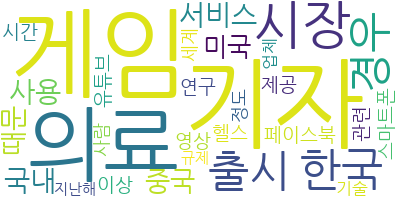

In [19]:
wc.generate_from_frequencies(fd)
wc.to_image()